In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

from scipy.stats import norm
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KernelDensity

In [3]:
temp_data0 = pd.read_csv("Datasets/GlobalLandTemperaturesByCountry.csv")

Extracting the list of all countries

In [20]:
country_list0 = np.array(temp_data0['Country'])
country_list_data = set(country_list0)


In [53]:
print(country_list_data)

{'Central African Republic', 'Ethiopia', 'Dominica', 'Angola', 'Finland', 'Bonaire, Saint Eustatius And Saba', 'El Salvador', 'Libya', 'Sao Tome And Principe', 'South Africa', 'Italy', 'France (Europe)', 'Heard Island And Mcdonald Islands', 'Paraguay', 'Cape Verde', 'Serbia', 'Nepal', 'Sint Maarten', 'South America', 'Bahamas', 'Fiji', 'Georgia', 'French Polynesia', 'Puerto Rico', 'Niue', 'Kuwait', 'Armenia', 'Mayotte', 'Denmark (Europe)', 'Turkmenistan', 'Bulgaria', 'Venezuela', 'Aruba', 'Senegal', 'Saint Kitts And Nevis', 'French Guiana', 'Palestina', 'Congo', 'Rwanda', 'Belarus', 'Haiti', 'Seychelles', 'Chile', 'North Korea', 'Congo (Democratic Republic Of The)', 'Gaza Strip', 'Mali', 'Europe', 'Kenya', 'Djibouti', 'Indonesia', 'Germany', 'Lesotho', 'Gambia', 'New Zealand', 'Russia', 'Saint Martin', 'Saint Vincent And The Grenadines', 'Peru', 'Martinique', 'Thailand', 'Malaysia', 'Argentina', 'Brazil', 'Denmark', 'Poland', 'Netherlands', 'Macau', 'Malawi', 'French Southern And Antar

Function to extract the mean of the fitted data

In [79]:
start_year = 1964
start_date = str(start_year)+'-01-01'
end_year = 2012
end_date = str(end_year)+'-12-01'
num_years = end_year - start_year + 1

In [80]:
def func_climate_stats(temp_data0,country,start_date,end_date,num_years):
    temp_data_USA = temp_data0[temp_data0['Country'].str.contains(country)]
    temp_data = []
    date_data = []
    st = 0
    end = 0
    ind = 0
    
    flag = 1
    
    for d in temp_data_USA['dt']:
        if(d==start_date):
            st = ind
        if(st!=0 and end==0):
            date_data.append(d)
        if(d==end_date):
            end = ind
        ind+=1
    
    temp_data = np.array(temp_data_USA['AverageTemperature'][st:end+1])
    
    if(len(temp_data)/12!=num_years or np.isnan(np.sum(temp_data))):
        flag = 0
        return 0, 0, flag
    
    t1 = temp_data.reshape(-1,12)
    
    x_arr = np.linspace(0,num_years-1,num_years)
    p = np.zeros([12,2])
    
    for k in range(12):
        p[k,:] = np.polyfit(x_arr,t1[:,k],1)
    
    p_mean = np.mean(p[:,0])
    p_std = np.std(p[:,0])
    
    return p_mean, p_std, flag
    

In [81]:
p_mean,p_std,_ = func_climate_stats(temp_data0,'Georgia',start_date,end_date,num_years)

Main function to get for all countries

In [82]:
ind = 0
p_mean = np.zeros([len(country_list_data),1])
p_std = np.zeros([len(country_list_data),1])

for country in country_list_data:
    p_m,p_s,flag = func_climate_stats(temp_data0,country,start_date,
                                      end_date,num_years)
    if flag==1:
        print(ind,country)
        p_mean[ind] = p_m
        p_std[ind] = p_s
        ind+=1
    else:
        print('Not done for',country)

0 Central African Republic
1 Ethiopia
2 Dominica
3 Angola
4 Finland
5 Bonaire, Saint Eustatius And Saba
6 El Salvador
7 Libya
8 Sao Tome And Principe
9 South Africa
10 Italy


/Users/aditya/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


Not done for France (Europe)
11 Heard Island And Mcdonald Islands
12 Paraguay
13 Cape Verde
14 Serbia
15 Nepal
16 Sint Maarten
17 South America
18 Bahamas
19 Fiji
20 Georgia
21 French Polynesia
22 Puerto Rico
23 Niue
24 Kuwait
25 Armenia
26 Mayotte


/Users/aditya/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


Not done for Denmark (Europe)
27 Turkmenistan
28 Bulgaria
29 Venezuela
30 Aruba
31 Senegal
32 Saint Kitts And Nevis
33 French Guiana
34 Palestina
35 Congo
36 Rwanda
37 Belarus
38 Haiti
39 Seychelles
40 Chile
41 North Korea


/Users/aditya/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


Not done for Congo (Democratic Republic Of The)
42 Gaza Strip
43 Mali
44 Europe
45 Kenya
46 Djibouti
47 Indonesia
48 Germany
49 Lesotho
50 Gambia
51 New Zealand
52 Russia
53 Saint Martin
54 Saint Vincent And The Grenadines
55 Peru
56 Martinique
57 Thailand
58 Malaysia
59 Argentina
60 Brazil
61 Denmark
62 Poland
63 Netherlands
64 Macau
65 Malawi
66 French Southern And Antarctic Lands
67 Timor Leste
68 United States
69 Madagascar
70 Svalbard And Jan Mayen
71 Cayman Islands
72 Lithuania
73 Bolivia
74 New Caledonia
75 Uzbekistan
76 Guam
77 Singapore
78 Cambodia
79 Anguilla
80 Czech Republic
81 Mauritania
82 Kingman Reef
83 San Marino
84 United Kingdom
85 Montserrat
86 British Virgin Islands
87 Iceland
88 Macedonia
89 Moldova


/Users/aditya/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


Not done for Falkland Islands (Islas Malvinas)
90 Burma
91 Tonga
92 Oceania
93 Bahrain
94 Zimbabwe
95 Nicaragua
96 Uganda
97 Montenegro
98 India
99 Papua New Guinea
100 China
101 Kiribati
102 Sudan
103 Taiwan
104 Bosnia And Herzegovina
105 Samoa
106 Saint Pierre And Miquelon
107 Baker Island
108 Cuba
109 Federated States Of Micronesia
110 Switzerland
111 Ukraine
112 Ghana
113 Zambia
114 Tunisia
115 Cameroon
116 American Samoa
117 Mozambique
118 Mongolia
119 Hong Kong
120 Japan
121 Comoros
122 Croatia
123 Oman
124 Palmyra Atoll
125 Spain
126 Guinea
127 Jersey


/Users/aditya/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


Not done for Netherlands (Europe)
128 Tajikistan
129 Mauritius
130 Guatemala
131 Malta
132 Algeria
133 Chad
134 Austria
135 Equatorial Guinea
136 Monaco
137 Reunion
138 South Korea
139 Philippines
140 Jamaica
141 Liechtenstein
142 Belize
143 Norway
144 Western Sahara
145 Togo
146 Luxembourg
147 Vietnam
148 Sweden
149 Panama
150 Guernsey
151 Andorra
152 United Arab Emirates
153 Northern Mariana Islands
154 Afghanistan
155 Hungary
156 Portugal
157 Somalia
158 Australia
159 Bangladesh
160 Guadeloupe
161 Dominican Republic
162 Swaziland


/Users/aditya/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


Not done for United Kingdom (Europe)
163 Colombia
164 Pakistan
165 Yemen
166 Costa Rica
167 Turks And Caicas Islands
168 Uruguay
169 Latvia
170 Cyprus
171 Åland
172 Iran
173 Azerbaijan
174 Estonia
175 Tanzania
176 North America
177 Namibia
178 Israel
179 Mexico
180 Kazakhstan
181 Lebanon
182 Palau
183 Jordan
184 Burundi
185 Syria
186 Belgium
187 Nigeria
188 Greenland
189 Trinidad And Tobago
190 Virgin Islands
191 Turkey
192 Grenada
193 Saint Lucia
194 Slovenia
195 Africa
196 Isle Of Man
197 Asia
198 Canada
199 Greece
200 Iraq
201 Saint Barthélemy
202 Albania
203 Faroe Islands
204 Antigua And Barbuda
205 France
206 Qatar
207 Gabon
208 Eritrea
209 Guinea Bissau
210 Laos
211 Ecuador
212 Guyana
213 Curaçao
214 Barbados
215 Christmas Island
216 Liberia
217 Kyrgyzstan
Not done for Antarctica
218 Niger
219 Benin
220 Saudi Arabia
221 Suriname
222 Honduras
223 Morocco
224 Ireland
225 Romania
226 Burkina Faso
227 South Georgia And The South Sandwich Isla
228 Sri Lanka
229 Slovakia
230 Bhutan
231

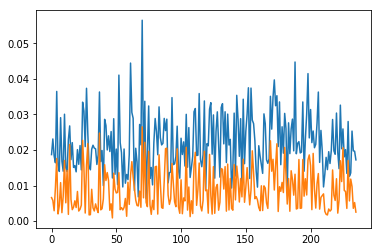

In [83]:
plt.plot(p_mean[0:ind])
plt.plot(p_std[0:ind])

In [84]:
np.mean(p_mean)
#np.std(p_std)

0.021502927269673164

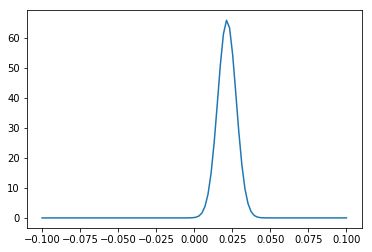

In [85]:
x_gauss = np.linspace(-0.1,0.1,100)
g_gauss = norm.pdf(x_gauss,np.mean(p_mean),np.std(p_std))
plt.plot(x_gauss,g_gauss)